<a href="https://colab.research.google.com/github/wolfos20/Oib-Sip-Internship/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NAME - UTTAM KUMAR

### DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE

### TASK 3

### PROJECT NAME - Sales Prediction

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv(r"/content/drive/MyDrive/oib sip files/Advertising.csv")

In [7]:
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df=df.drop(['Unnamed: 0'],axis= 1)
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.shape

(200, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

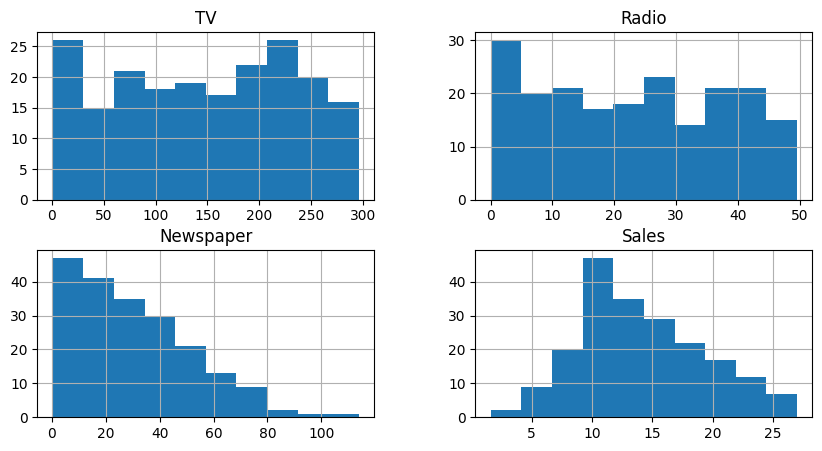

In [12]:
df.hist(figsize=(10,5))

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## VISUALIZATION OF DATASET

<Axes: >

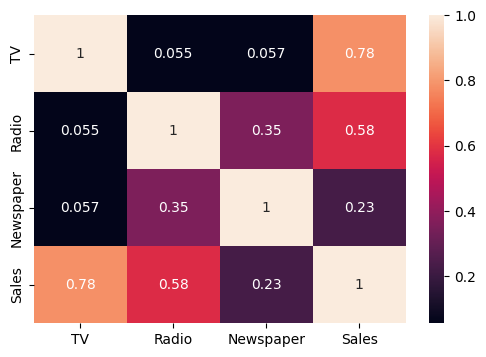

In [14]:
# Plotting the Correlation Matrix
fig, ax =plt.subplots(figsize=(6,4))
sns.heatmap(df.corr(),annot=True)


<Figure size 700x300 with 0 Axes>

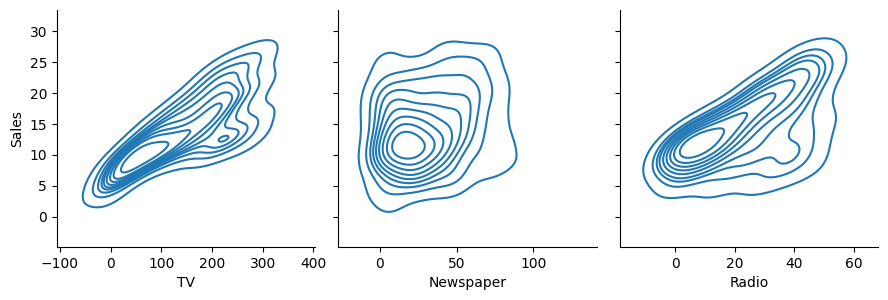

In [15]:
plt.figure(figsize=(7,3))
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3, kind='kde')
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

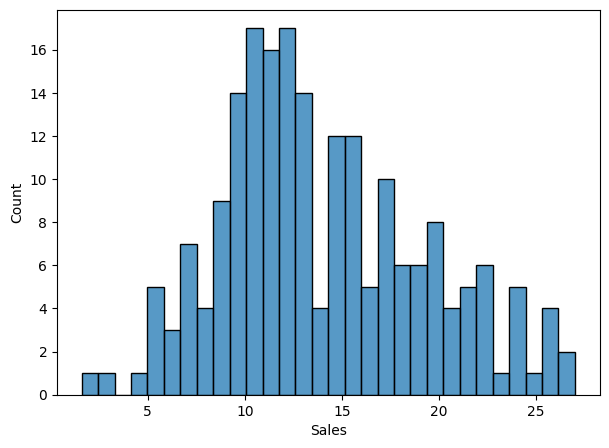

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(df.Sales,bins=30)

SPLITTING DATA

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
y_pred


array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [21]:
print(model.intercept_)
print(model.coef_)

2.979067338122629
[0.04472952 0.18919505 0.00276111]


In [22]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred.flatten()
})
act_predict.head(10)

,Actual,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


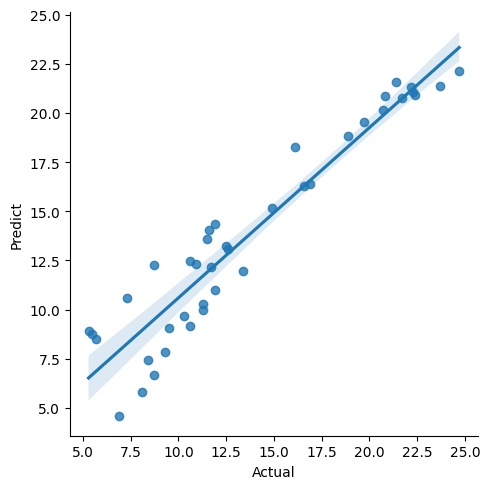

In [25]:
sns.lmplot(data = act_predict, x= 'Actual', y = "Predict")

MODEL EVALUATION

In [26]:
from sklearn import metrics


In [27]:
print("Mean_absolute_error:",metrics.mean_absolute_error(y_test,y_pred))


Mean_absolute_error: 1.4607567168117603


In [28]:
print("Mean_squared_error:",metrics.mean_squared_error(y_test,y_pred))


Mean_squared_error: 3.1740973539761033


In [29]:
print("Squre_Mean_absolute_error:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


Squre_Mean_absolute_error: 1.208617688440708


In [30]:
print("r2_score:",metrics.r2_score(y_test,y_pred))

r2_score: 0.899438024100912


Text(0.5, 1.0, 'Model Performance')

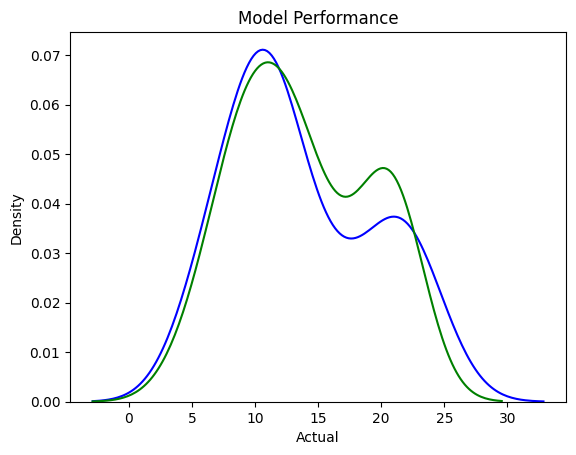

In [31]:
ax = sns.kdeplot(act_predict['Actual'], color='b', label='Actual Price')
sns.kdeplot(act_predict['Predict'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")